In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dog_df = pd.read_csv("../main_data/locale_specific_data/Sonoma_nontime_cleaned_ry.csv").drop(["Unnamed: 0"], axis=1)

dog_df.head()

breed       color     sex size date_of_birth animal_id  \
0          PIT BULL  GRAY/WHITE  Female  MED    2012-09-03   A296009   
1          PIT BULL  BLUE/WHITE  Female  MED    2012-10-09   A294143   
2  CAROLINA DOG/MIX  GOLD/WHITE    Male  MED    2007-09-07   A281788   
3      CHIHUAHUA SH         TAN    Male  TOY    2007-10-01   A297574   
4          PIT BULL   TAN/WHITE    Male  MED    2012-10-29   A298002   

  intake_date outcome_date  days_in_shelter      intake_type  ...  \
0  2013-08-22   2014-04-14              235         TRANSFER  ...   
1  2013-08-31   2014-04-14              226            STRAY  ...   
2  2013-09-19   2014-07-30              314            STRAY  ...   
3  2013-10-01   2014-01-01               92  OWNER SURRENDER  ...   
4  2013-10-08   2014-05-22              226            STRAY  ...   

       intake_condition     outcome_condition dob_season intake_season  \
0               HEALTHY           UNTREATABLE          3             2   
1               HEALTHY           UNTREATABLE          3             2   
2           UNTREATABLE           UNTREATABLE          3             3   
3  TREATABLE/MANAGEABLE  TREATABLE/MANAGEABLE          3             3   
4               HEALTHY               HEALTHY          3             3   

  outcome_season  outcome_adopt  outcome_adopt_subtype  intake_age  \
0              1          False                   none        0.97   
1              1          False                   none        0.89   
2              2          False                   none        6.03   
3              0          False                   none        6.00   
4              1           True               realtime        0.95   

   outcome_age pop_control  
0         1.61           1  
1         1.51           1  
2         6.90           0  
3         6.25           1  
4         1.57           1  

[5 rows x 23 columns]

In [28]:
dog_df.columns

Index(['breed', 'color', 'sex', 'size', 'date_of_birth', 'animal_id',
       'intake_date', 'outcome_date', 'days_in_shelter', 'intake_type',
       'intake_subtype', 'outcome_type', 'outcome_subtype', 'intake_condition',
       'outcome_condition', 'dob_season', 'intake_season', 'outcome_season',
       'outcome_adopt', 'outcome_adopt_subtype', 'intake_age', 'outcome_age',
       'pop_control'],
      dtype='object')

In [29]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6505 entries, 0 to 6504
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   breed                  6505 non-null   object 
 1   color                  6505 non-null   object 
 2   sex                    6505 non-null   object 
 3   size                   6505 non-null   object 
 4   date_of_birth          6505 non-null   object 
 5   animal_id              6505 non-null   object 
 6   intake_date            6505 non-null   object 
 7   outcome_date           6505 non-null   object 
 8   days_in_shelter        6505 non-null   int64  
 9   intake_type            6505 non-null   object 
 10  intake_subtype         6505 non-null   object 
 11  outcome_type           6505 non-null   object 
 12  outcome_subtype        6505 non-null   object 
 13  intake_condition       6505 non-null   object 
 14  outcome_condition      6505 non-null   object 
 15  dob_

In [30]:
dog_df.describe()

days_in_shelter   dob_season  intake_season  outcome_season  \
count      6505.000000  6505.000000    6505.000000     6505.000000   
mean         37.774942     1.593390       1.527287        1.495311   
std          55.528907     1.180869       1.193296        1.189857   
min           0.000000     0.000000       0.000000        0.000000   
25%          14.000000     1.000000       0.000000        0.000000   
50%          24.000000     2.000000       1.000000        1.000000   
75%          42.000000     3.000000       3.000000        3.000000   
max        1239.000000     3.000000       3.000000        3.000000   

        intake_age  outcome_age  pop_control  
count  6505.000000  6505.000000  6505.000000  
mean      3.006435     3.109777     0.786626  
std       3.234068     3.247292     0.409721  
min      -1.940000    -1.890000     0.000000  
25%       0.810000     0.900000     1.000000  
50%       1.950000     2.020000     1.000000  
75%       4.000000     4.070000     1.000000  
max      20.990000    20.990000     1.000000

### Try: pd.crosstab to look at two cateogorical counts

In [33]:
pd.crosstab(dog_df['size'], dog_df.sex)

sex    Female  Male  Unknown
size                        
LARGE     605   891        0
MED       900   860        2
PUPPY     424   427       36
SMALL     716   960        1
TOY       318   305        0
X-LRG      16    44        0

In [34]:
pd.crosstab(dog_df['size'], dog_df.outcome_adopt_subtype)

outcome_adopt_subtype  media  none  online  realtime
size                                                
LARGE                      7   839     272       378
MED                       16   821     402       523
PUPPY                      5   298     296       288
SMALL                      5   705     406       561
TOY                        0   225     124       274
X-LRG                      0    28      20        12

In [83]:
pd.crosstab(dog_df.dob_season, dog_df.intake_season)

intake_season    0    1    2     3
dob_season                        
0              875  229  187   307
1              275  797  207   322
2              187  191  505   271
3              439  350  219  1144

In [63]:

pd.crosstab(dog_df[dog_df['size']=='LARGE'].breed,
            dog_df[dog_df['size']=='LARGE'].outcome_adopt )


outcome_adopt        False  True 
breed                            
AIREDALE TERR/MIX        1      0
AKBASH                   0      1
AKITA                    2      0
AKITA/ALASKAN HUSKY      0      1
AKITA/GERM SHEPHERD      0      2
...                    ...    ...
STAFFORDSHIRE            0      1
TR WALKER HOUND          3      1
TR WALKER HOUND/MIX      1      3
WEIMARANER               2      0
WEIMARANER/MIX           0      1

[199 rows x 2 columns]

<Axes: xlabel='size', ylabel='Count'>

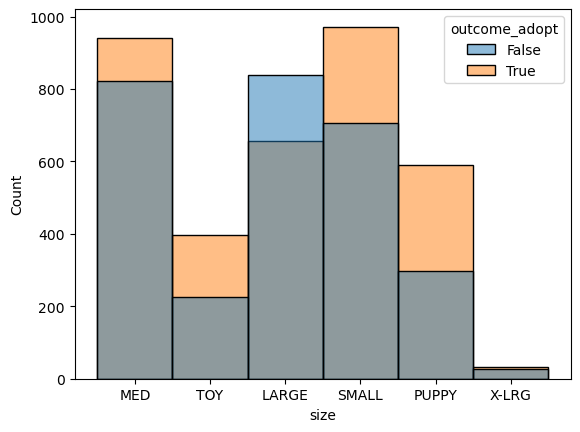

In [82]:
sns.histplot(data=dog_df, x="size",hue="outcome_adopt")

In [81]:
dog_df[dog_df.breed.str.contains("PIT")].value_counts("size")

size
MED      647
LARGE    486
PUPPY    216
SMALL     58
Name: count, dtype: int64

### Question: Is there any two properties that can be logistically classified?

#### Try: "days_in_shelter" against "outcome_adopt"

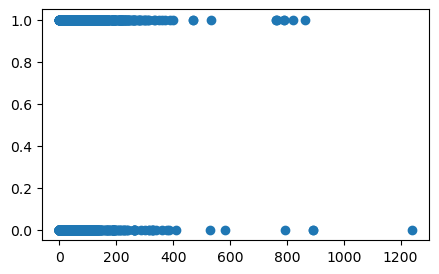

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(5,3))

plt.scatter(x=dog_df.days_in_shelter,
            y=dog_df.outcome_adopt)
plt.show()
plt.clf()

<Axes: xlabel='days_in_shelter', ylabel='Count'>

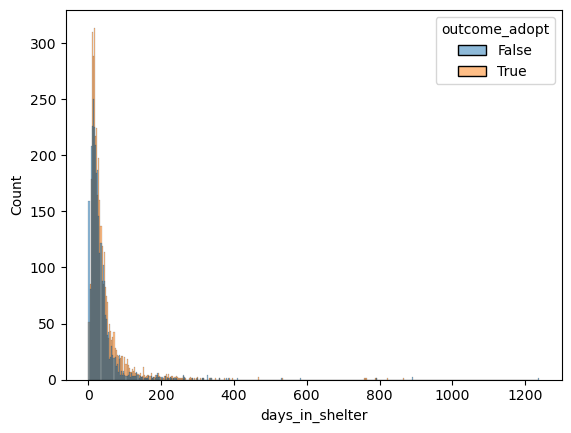

In [39]:
sns.histplot(data=dog_df,
            x="days_in_shelter",
            hue="outcome_adopt")

In [48]:
dog_df.groupby(by='outcome_adopt').days_in_shelter.std()

outcome_adopt
False    53.405053
True     56.961483
Name: days_in_shelter, dtype: float64

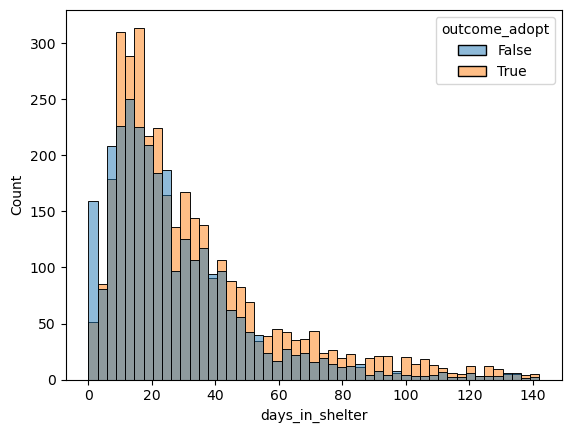

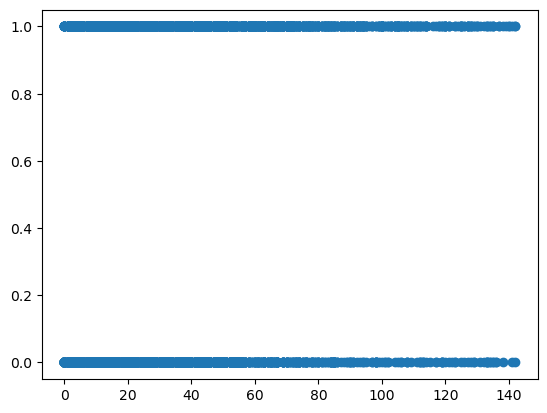

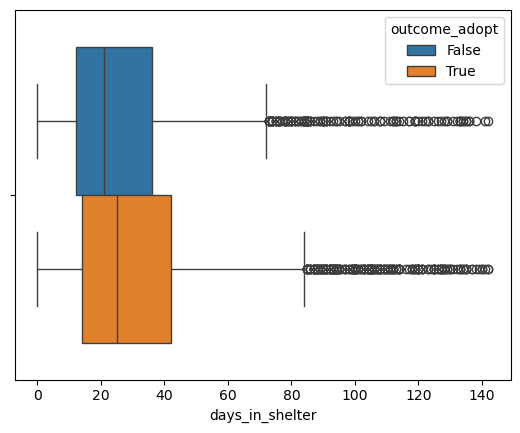

<Figure size 640x480 with 0 Axes>

In [50]:
PLOTDF = dog_df.copy()[dog_df.days_in_shelter < 2.5*56.9615]

sns.histplot(data=PLOTDF,
            x="days_in_shelter",
            hue="outcome_adopt")
plt.show()
plt.clf()

plt.scatter(x=PLOTDF.days_in_shelter,
            y=PLOTDF.outcome_adopt)
plt.show()
plt.clf()

sns.boxplot(data=PLOTDF,
            x="days_in_shelter",
            hue="outcome_adopt")
plt.show()
plt.clf()

del PLOTDF

#### Try: "intake_age" against "outcome_adopt"

<Axes: xlabel='intake_age', ylabel='Count'>

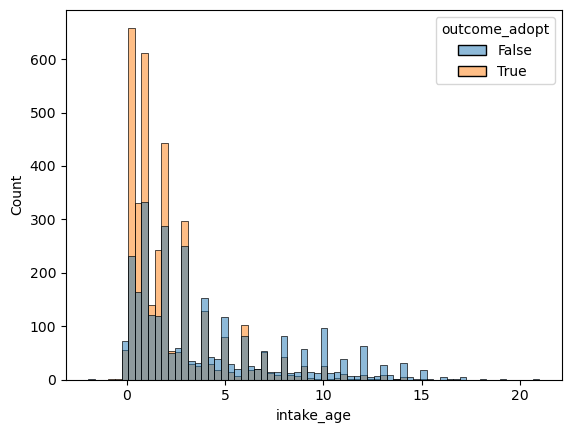

In [51]:
sns.histplot(data=dog_df,
            x="intake_age",
            hue="outcome_adopt")

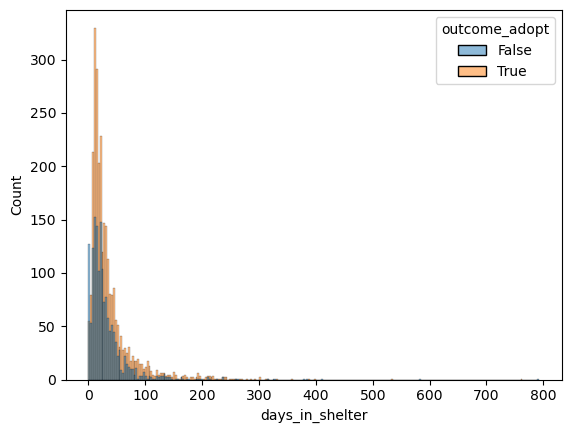

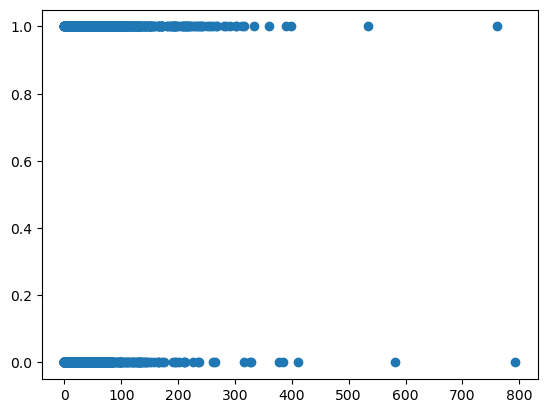

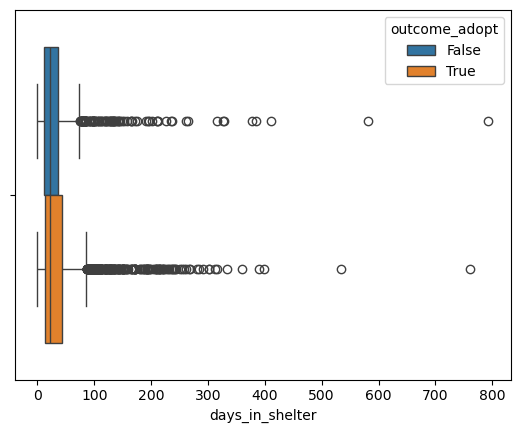

<Figure size 640x480 with 0 Axes>

In [52]:
PLOTDF = dog_df.copy()[dog_df.intake_age < 3.0]

sns.histplot(data=PLOTDF,
            x="days_in_shelter",
            hue="outcome_adopt")
plt.show()
plt.clf()

plt.scatter(x=PLOTDF.days_in_shelter,
            y=PLOTDF.outcome_adopt)
plt.show()
plt.clf()

sns.boxplot(data=PLOTDF,
            x="days_in_shelter",
            hue="outcome_adopt")
plt.show()
plt.clf()

del PLOTDF

### Series of seaborn.PairPlots to explore distributions within cleaned-up "Sonoma County" data

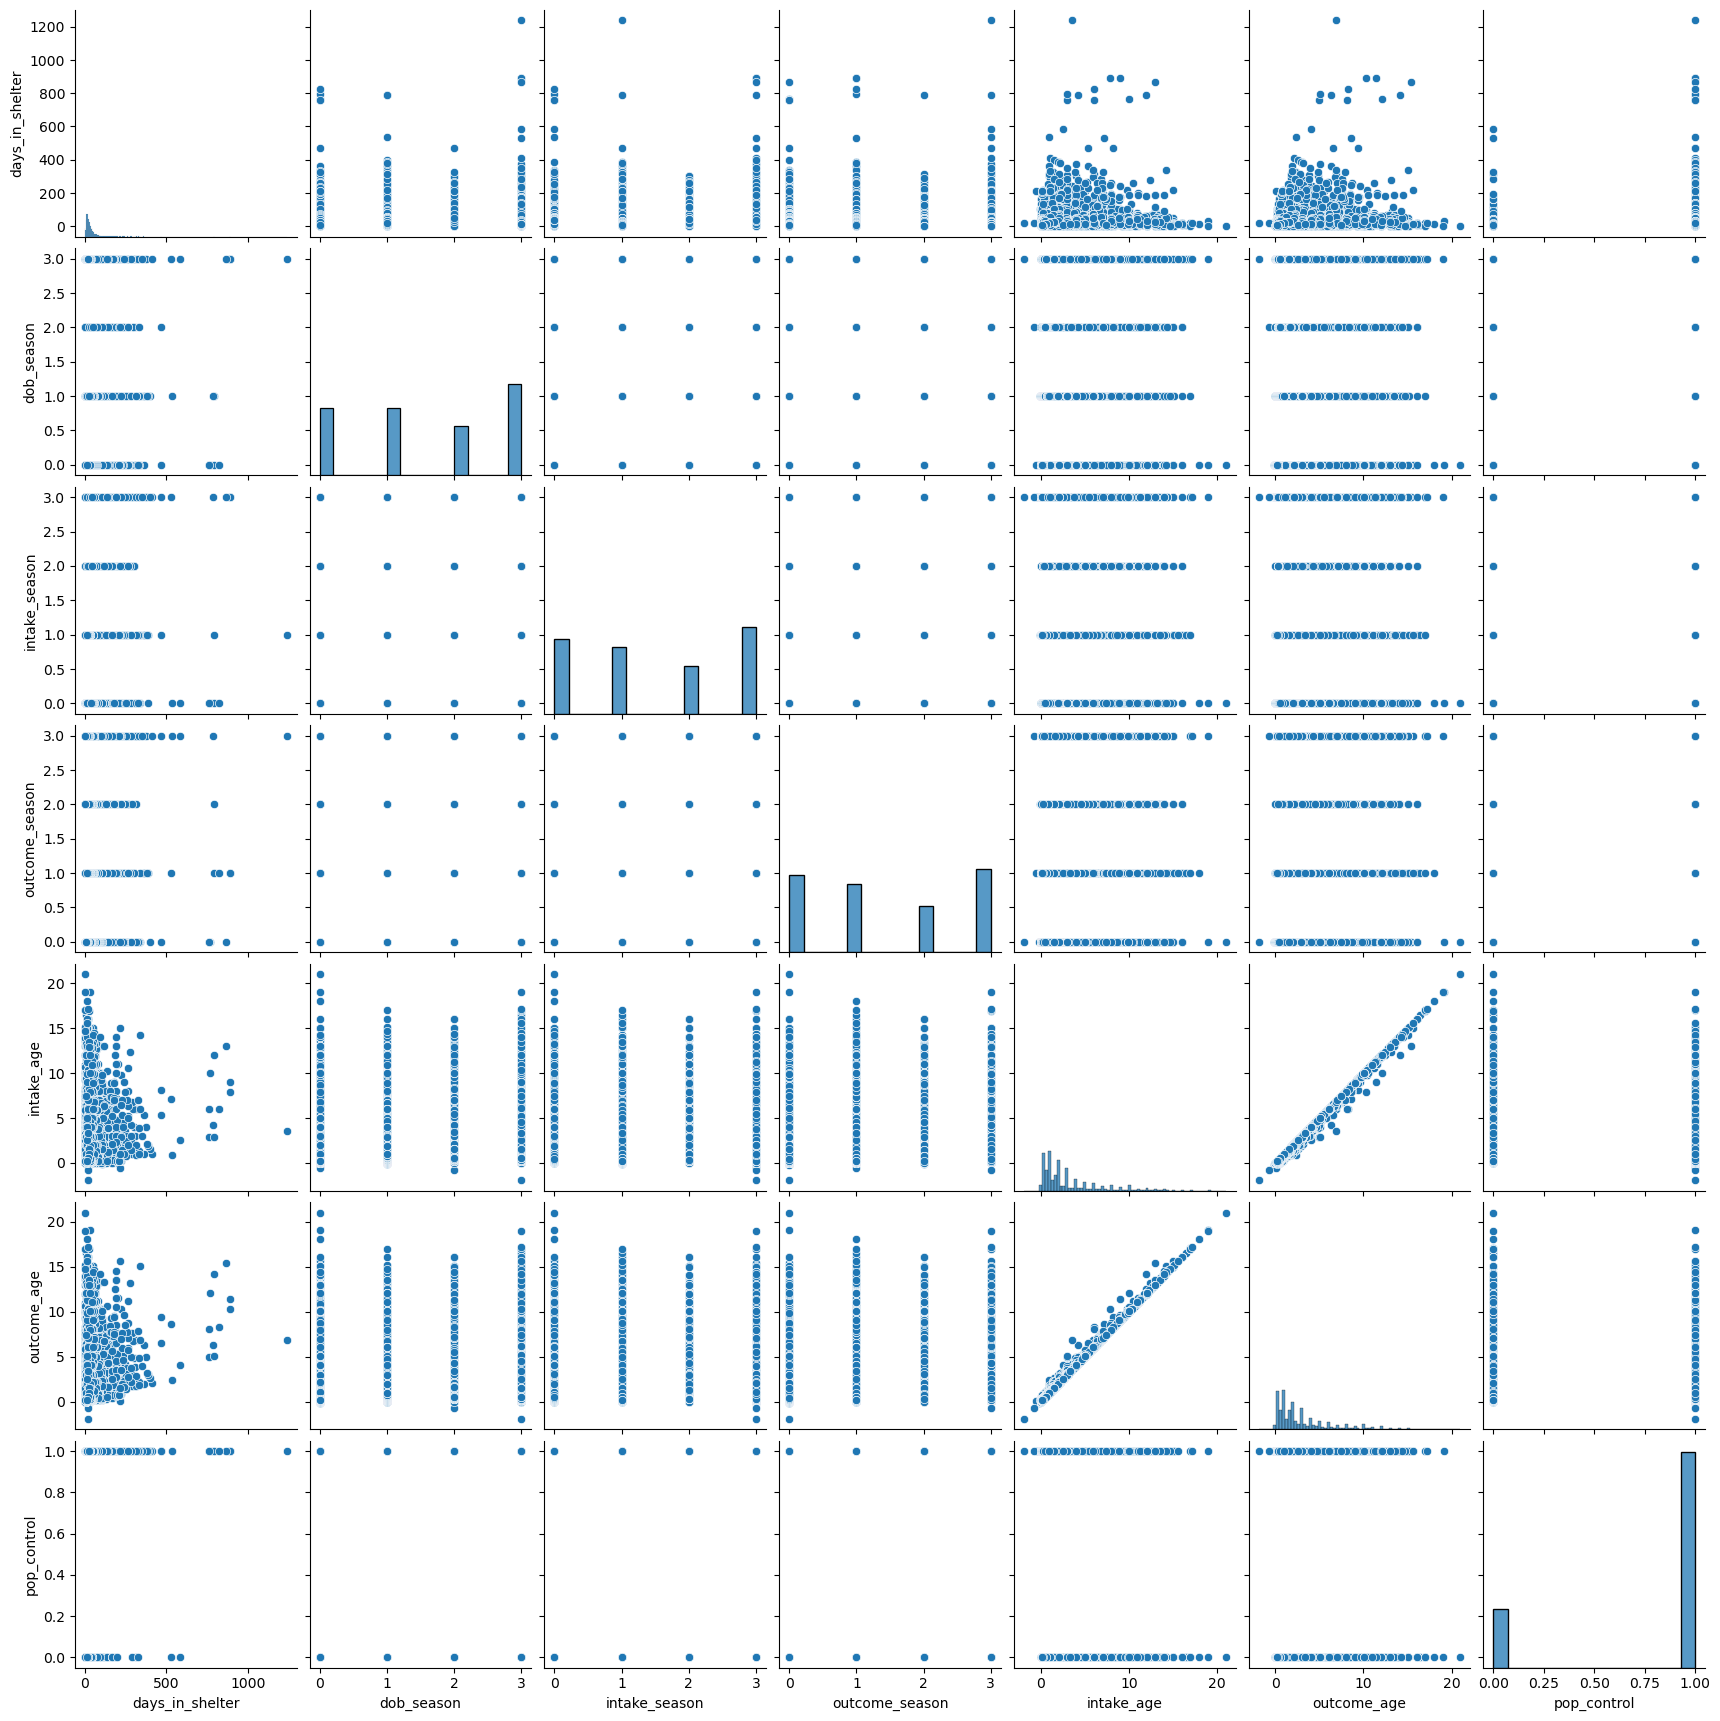

<Figure size 640x480 with 0 Axes>

In [6]:
sns.pairplot(dog_df[['sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']])
plt.show()
plt.clf()

intake_type
STRAY              4330
OWNER SURRENDER    1286
ADOPTION RETURN     319
CONFISCATE          288
TRANSFER            158
QUARANTINE          118
BORN HERE             6
Name: count, dtype: int64



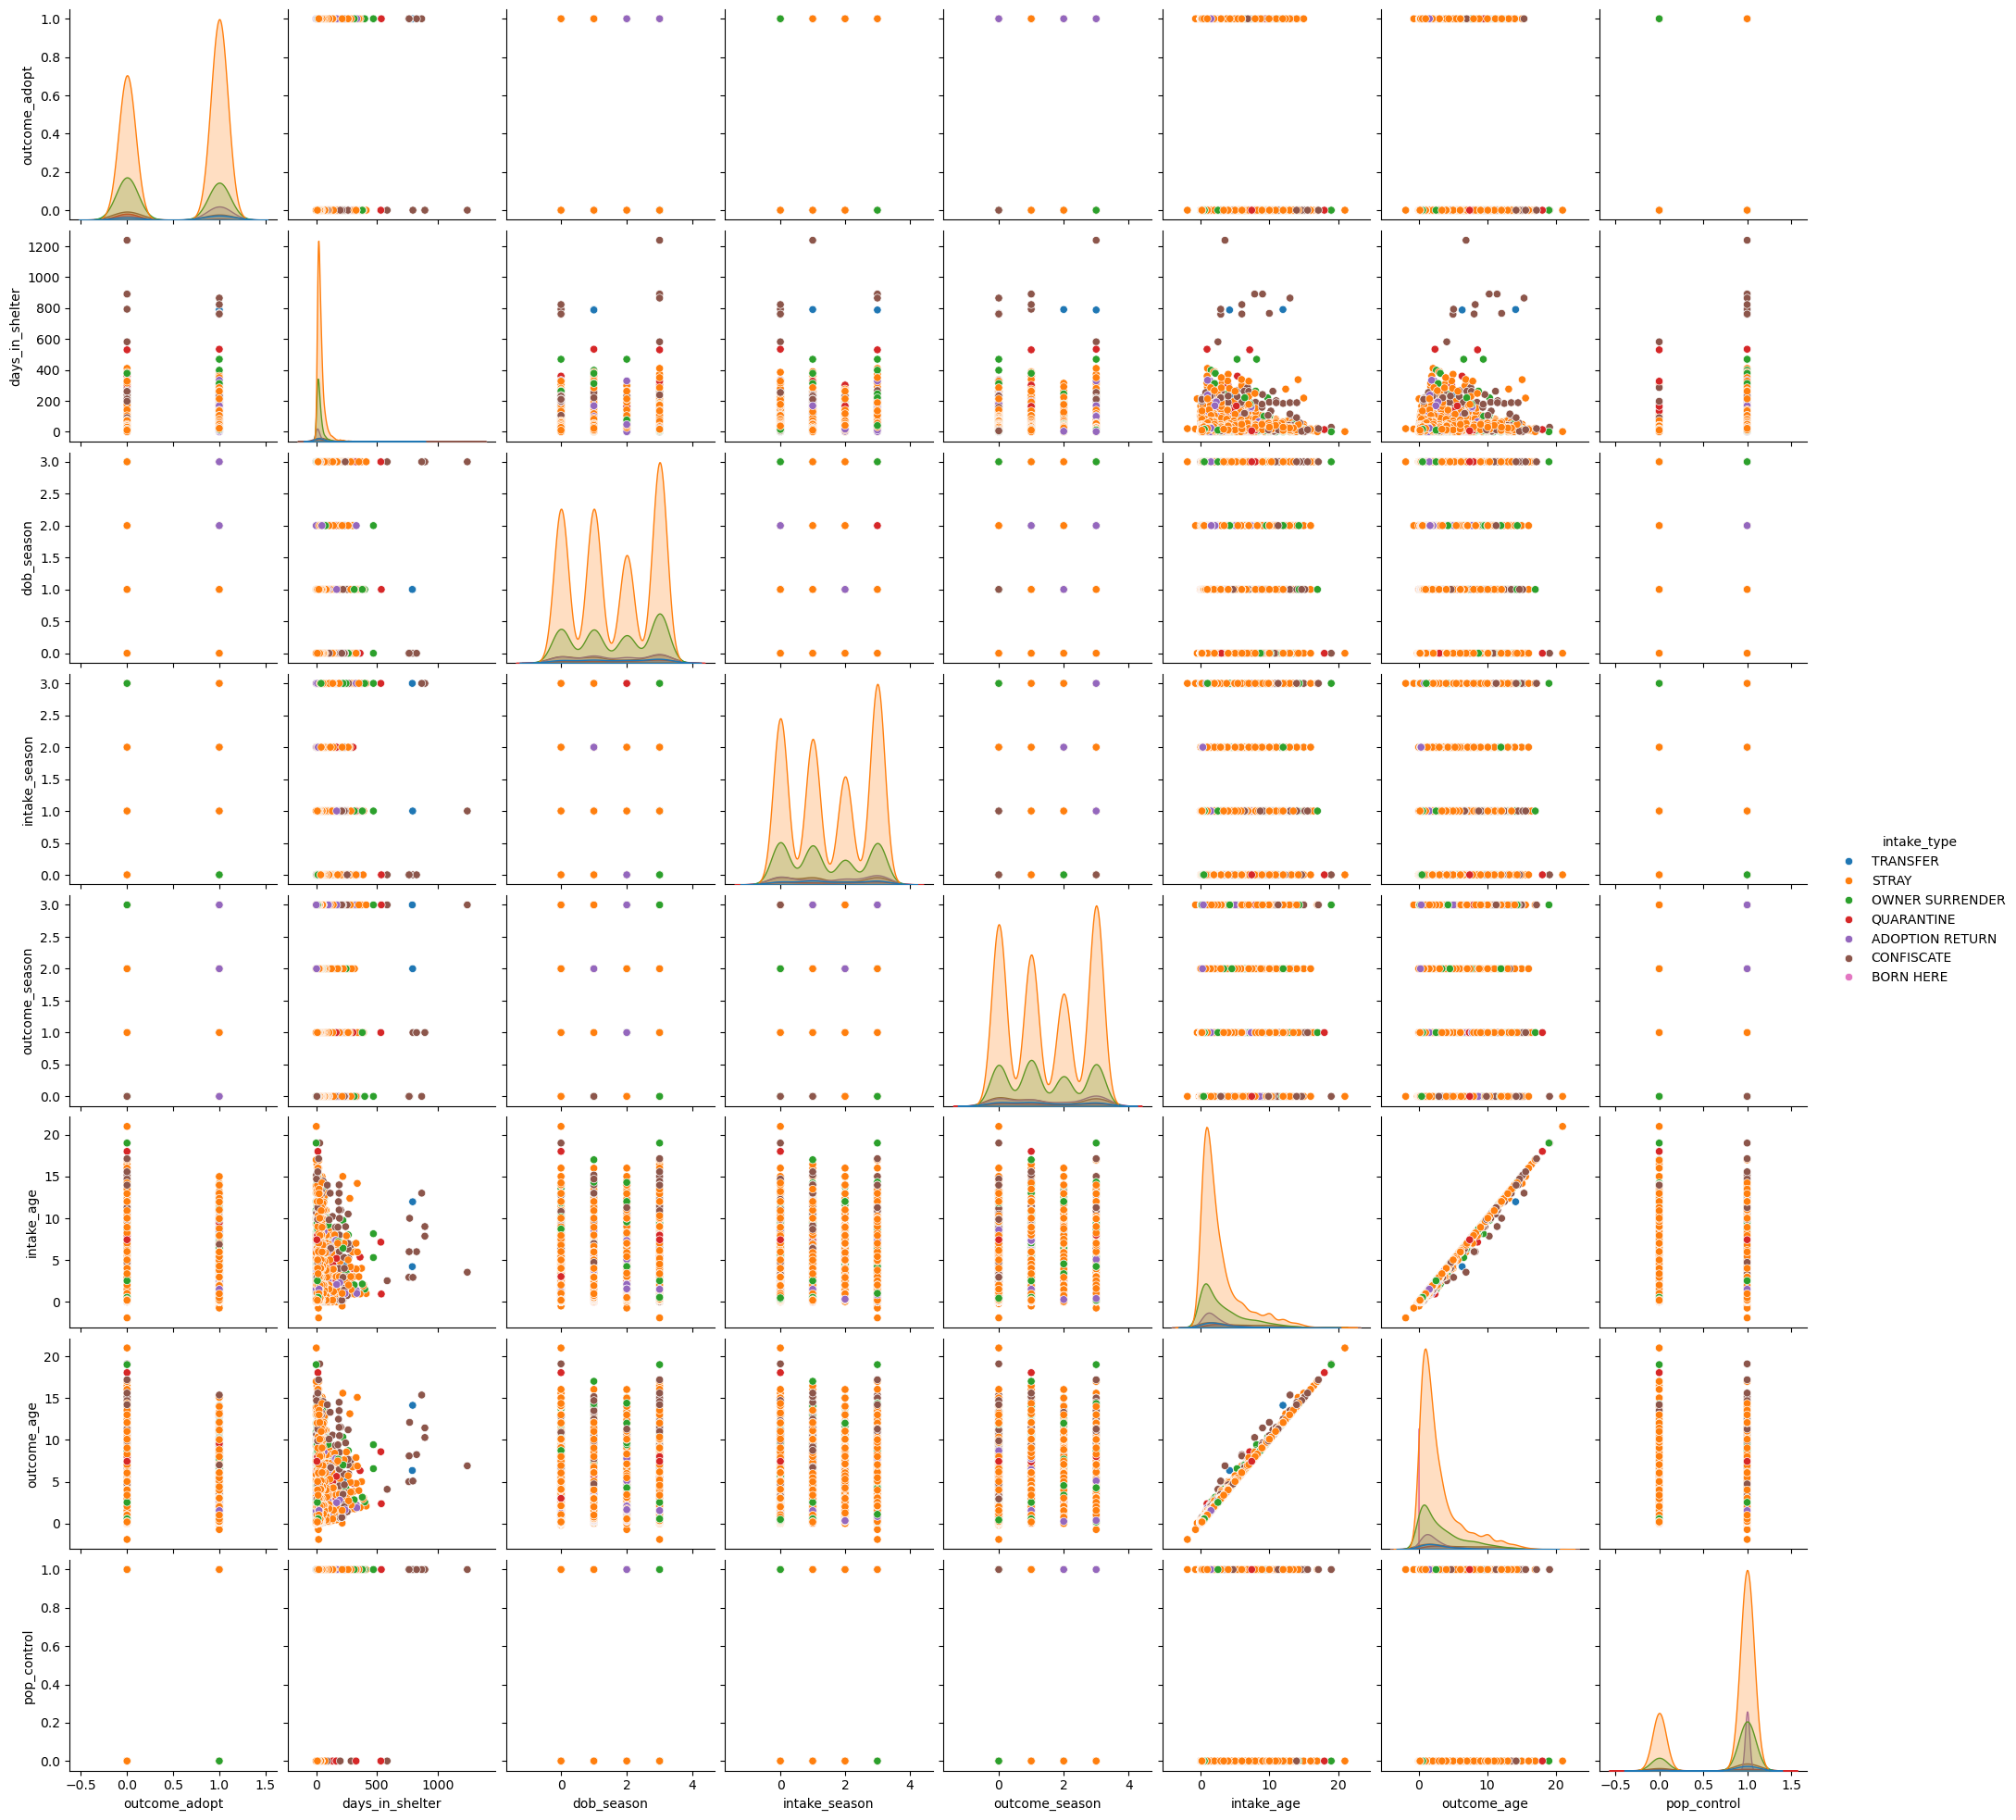

<Figure size 640x480 with 0 Axes>

In [19]:
print(dog_df.intake_type.value_counts())
print()
sns.pairplot(dog_df[["outcome_adopt",'sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']],
             hue="intake_type")
plt.show()
plt.clf()


intake_condition
HEALTHY                 3685
UNKNOWN                 1157
TREATABLE/MANAGEABLE     602
TREATABLE/REHAB          551
UNTREATABLE              510
Name: count, dtype: int64



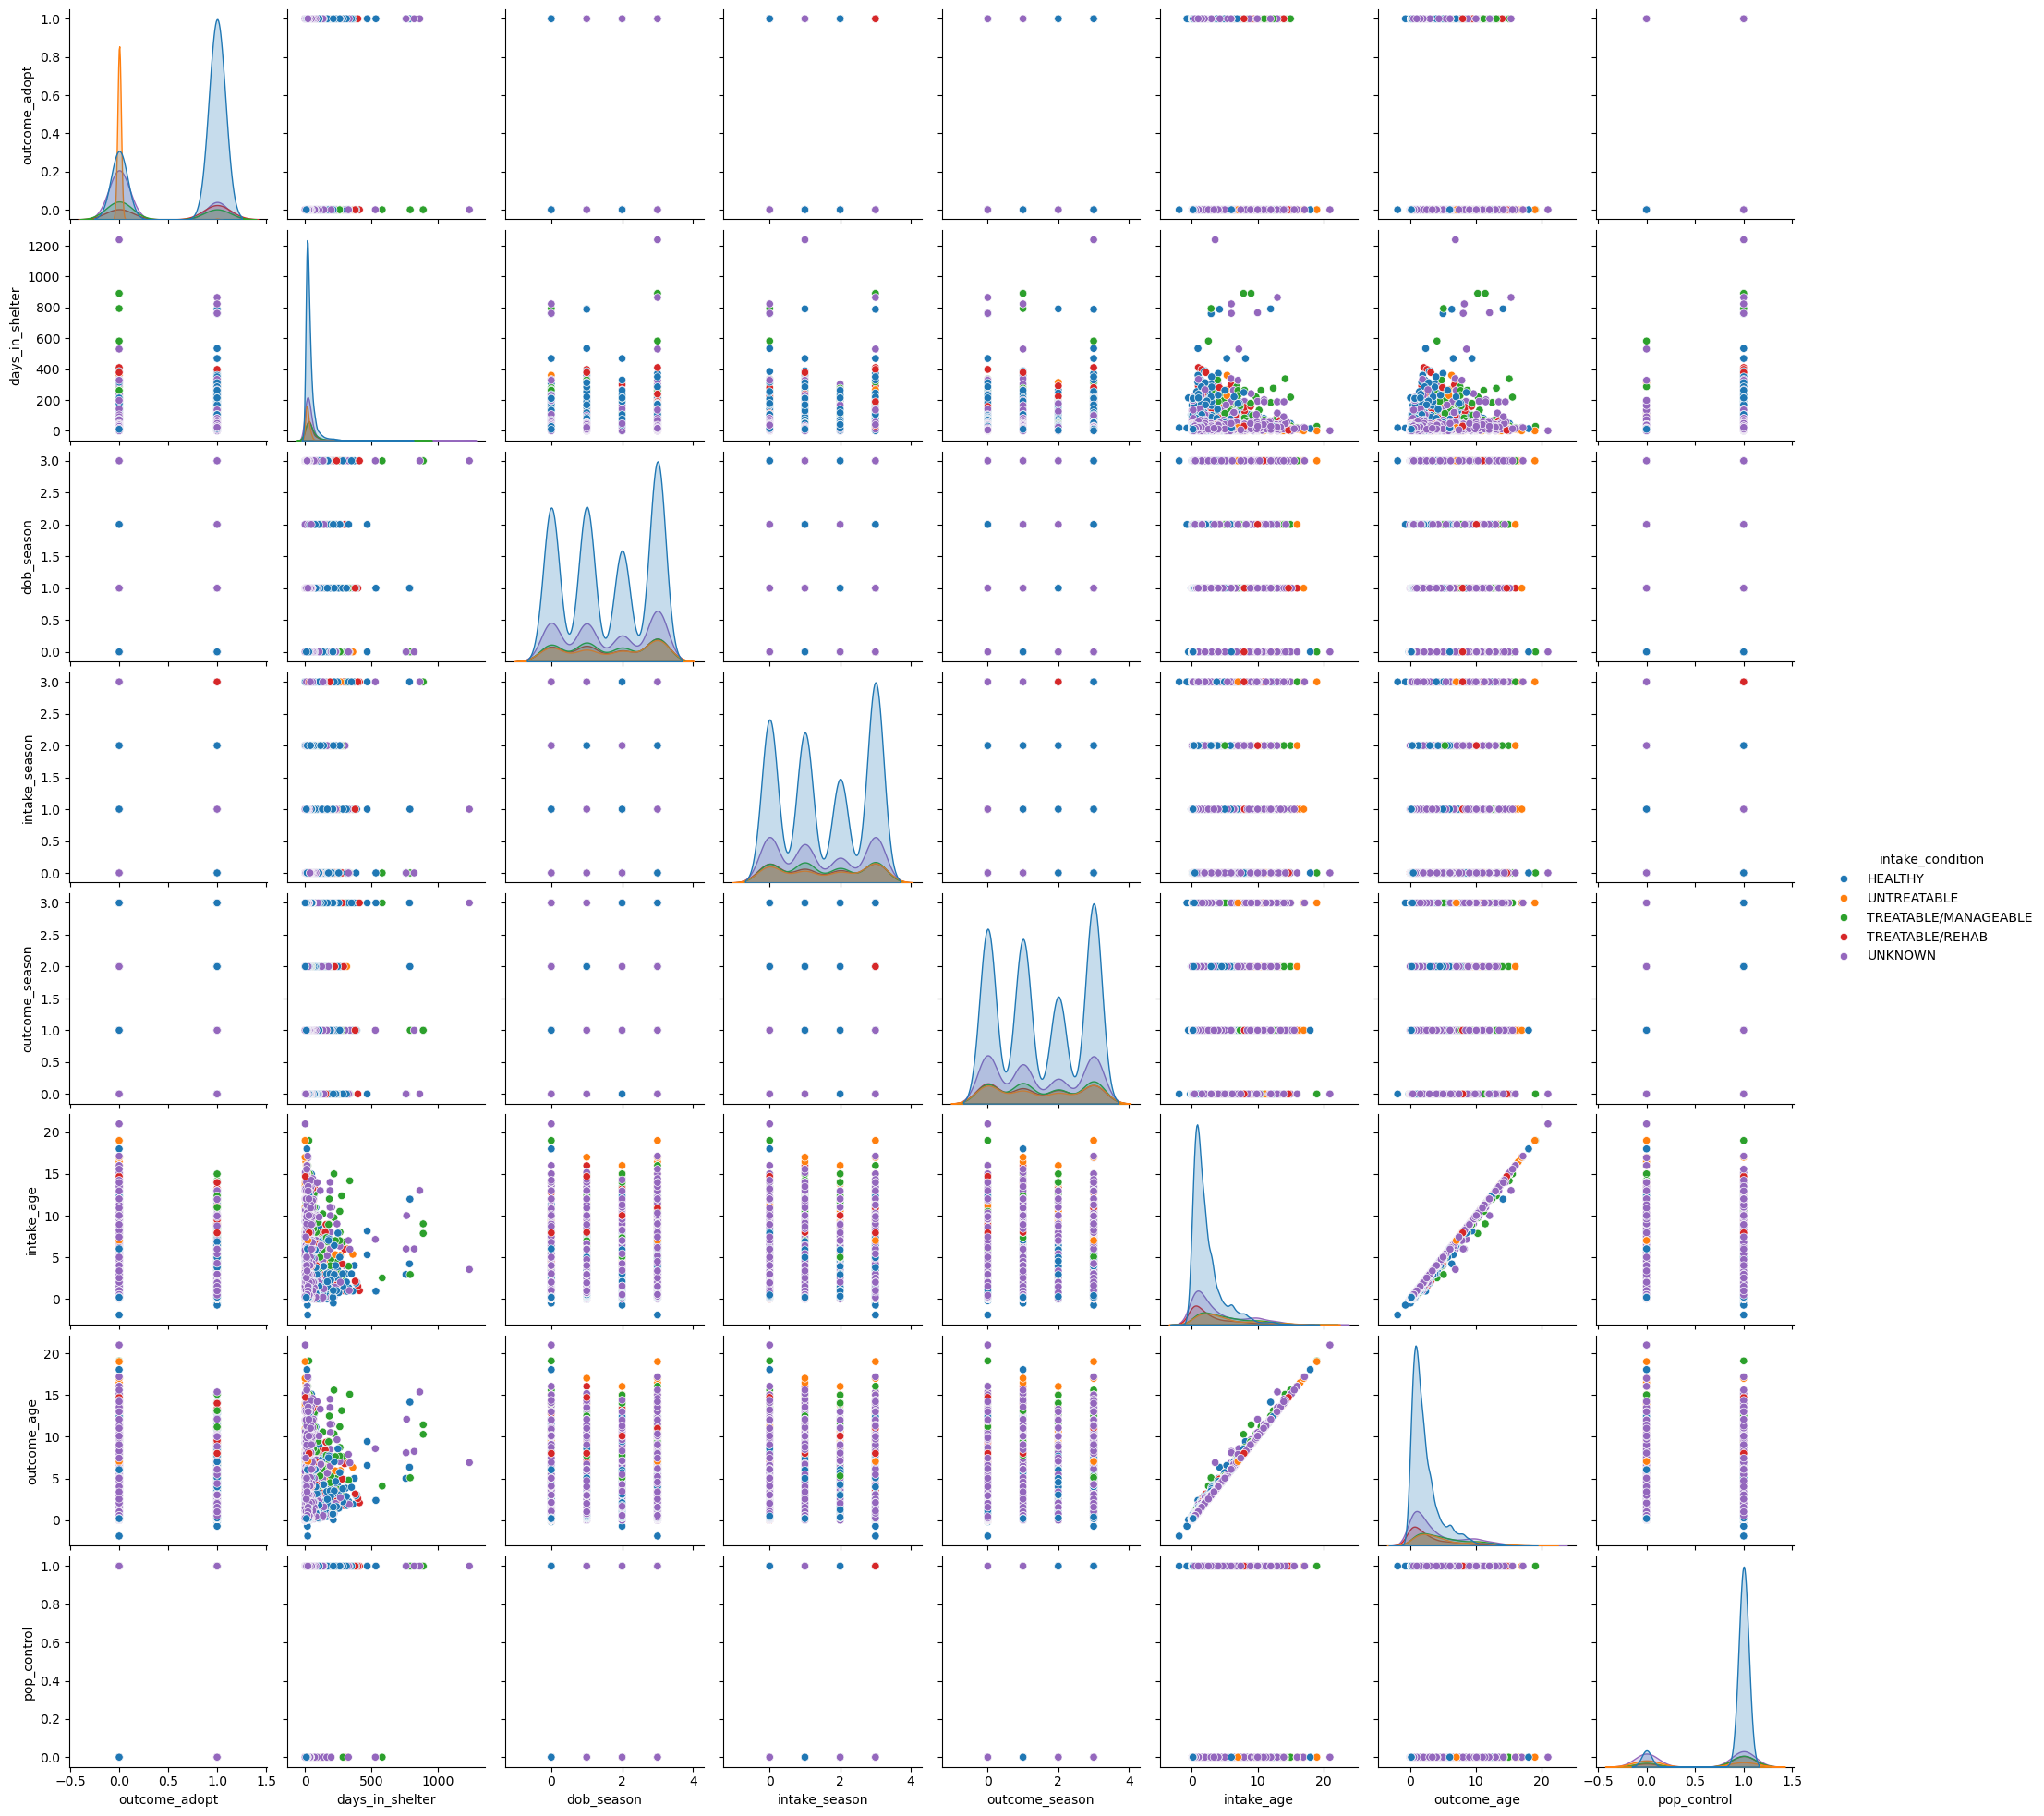

<Figure size 640x480 with 0 Axes>

In [31]:
print(dog_df.intake_condition.value_counts())
print()
sns.pairplot(dog_df[["outcome_adopt",'sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']],
             hue="intake_condition")
plt.show()
plt.clf()


outcome_adopt
True     3589
False    2916
Name: count, dtype: int64



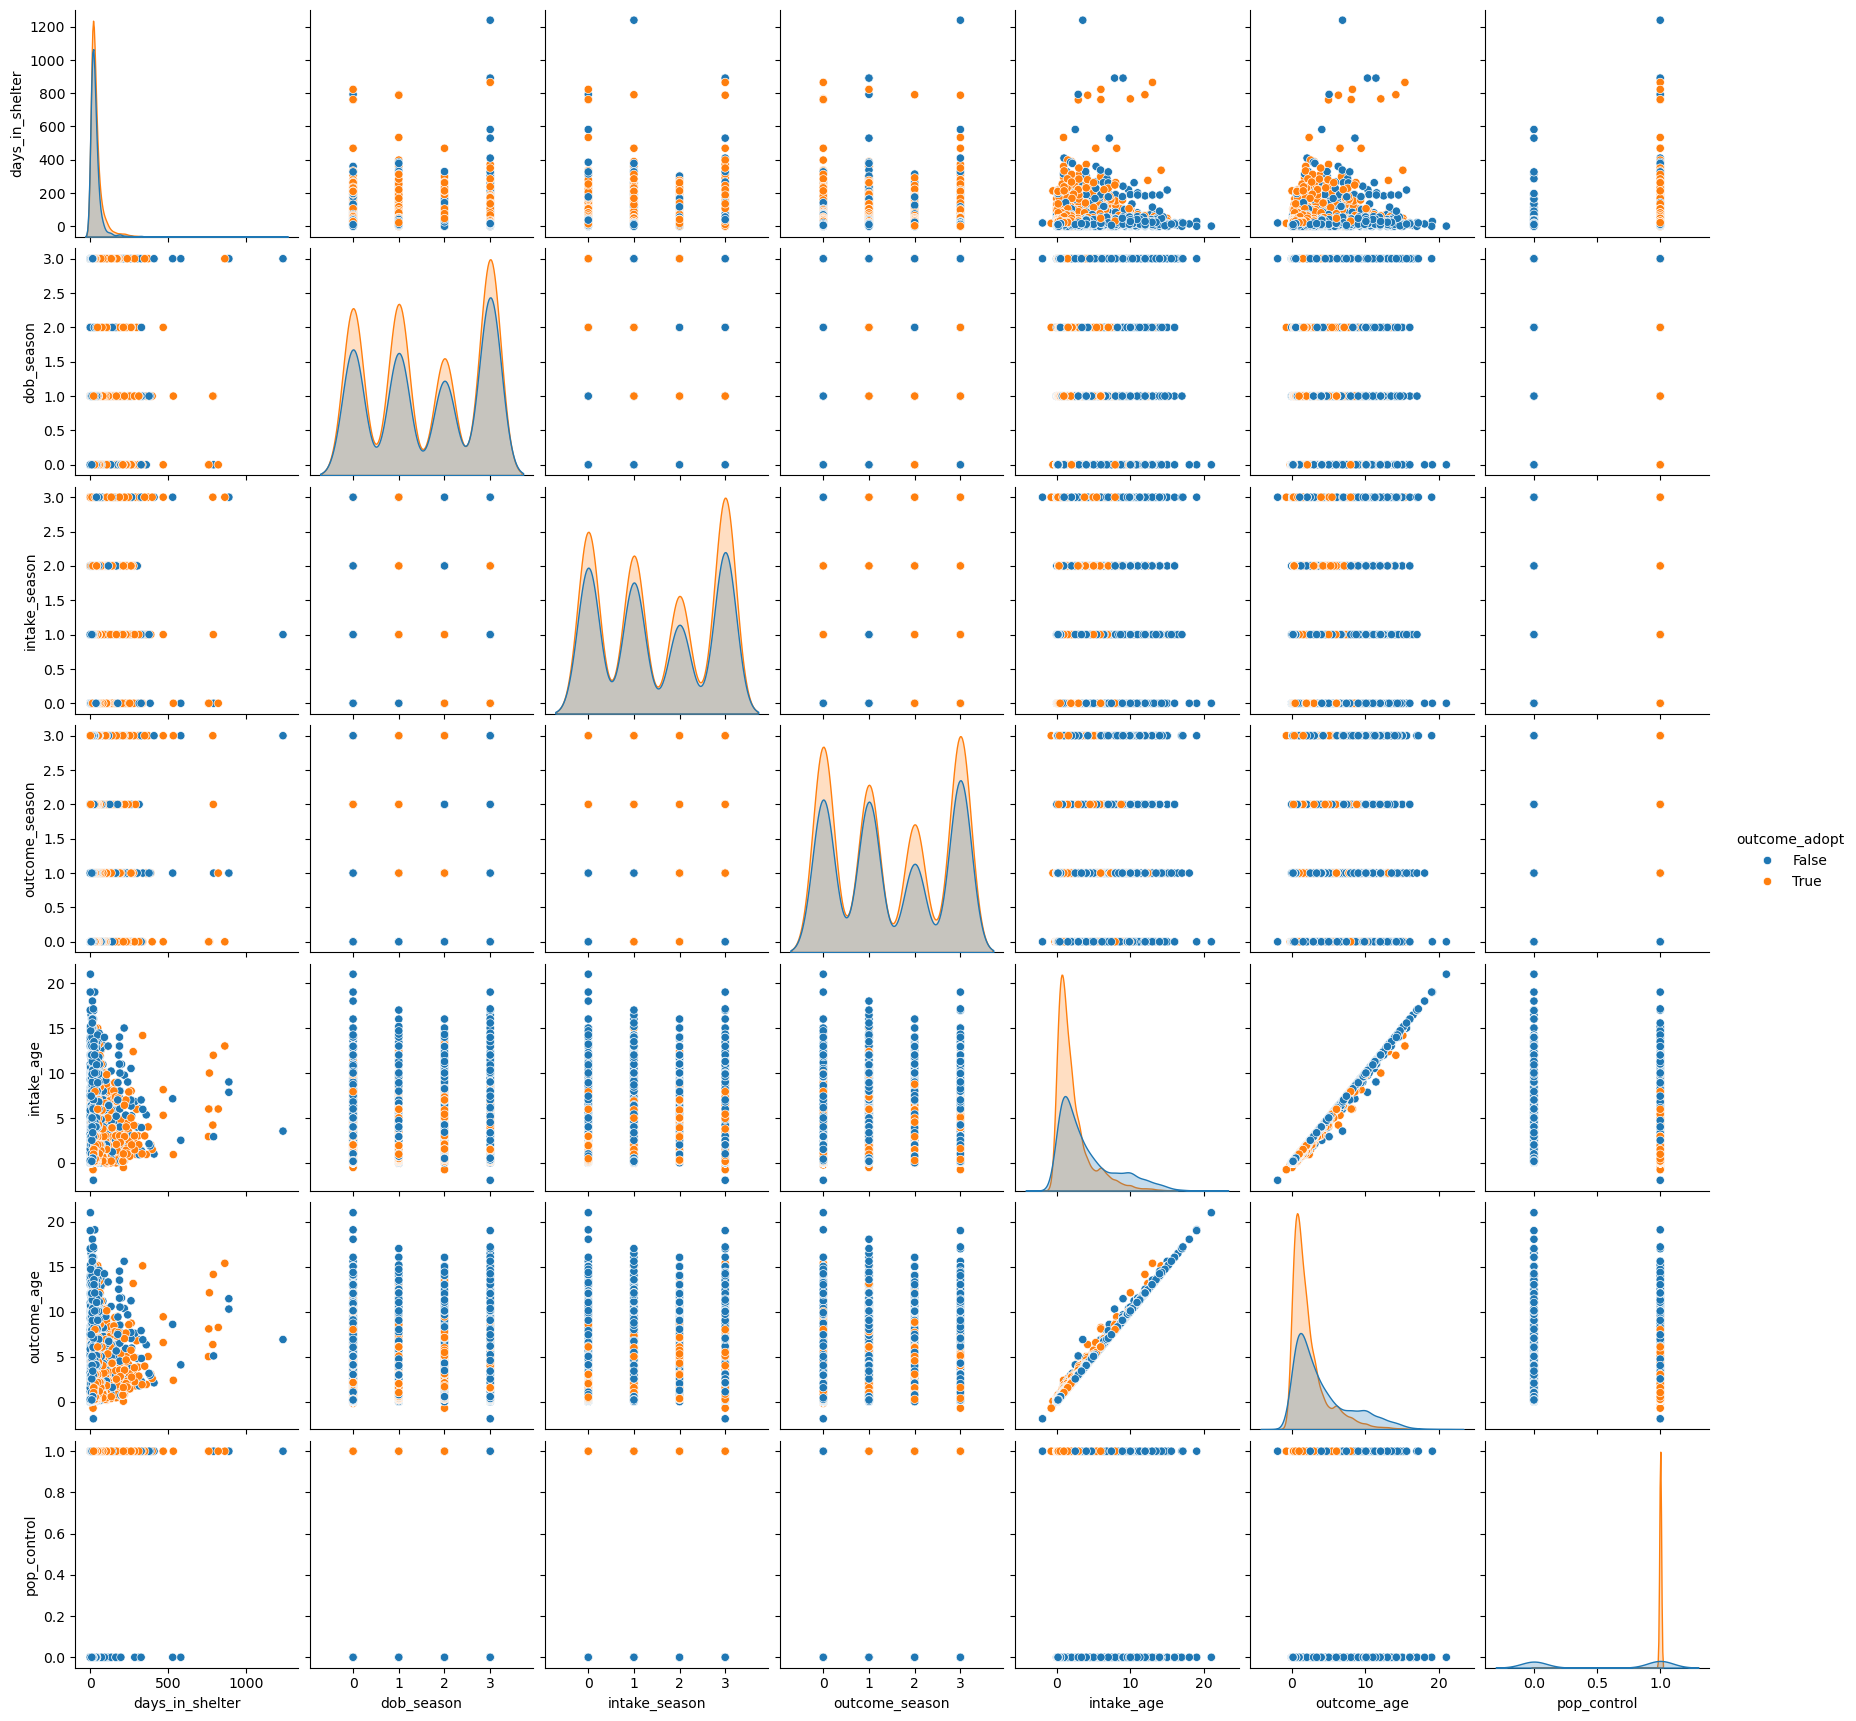

<Figure size 640x480 with 0 Axes>

In [20]:
print(dog_df.outcome_adopt.value_counts())
print()
sns.pairplot(dog_df[["outcome_adopt",'sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']],
             hue="outcome_adopt")
plt.show()
plt.clf()


outcome_adopt_subtype
none        2916
realtime    2036
online      1520
media         33
Name: count, dtype: int64



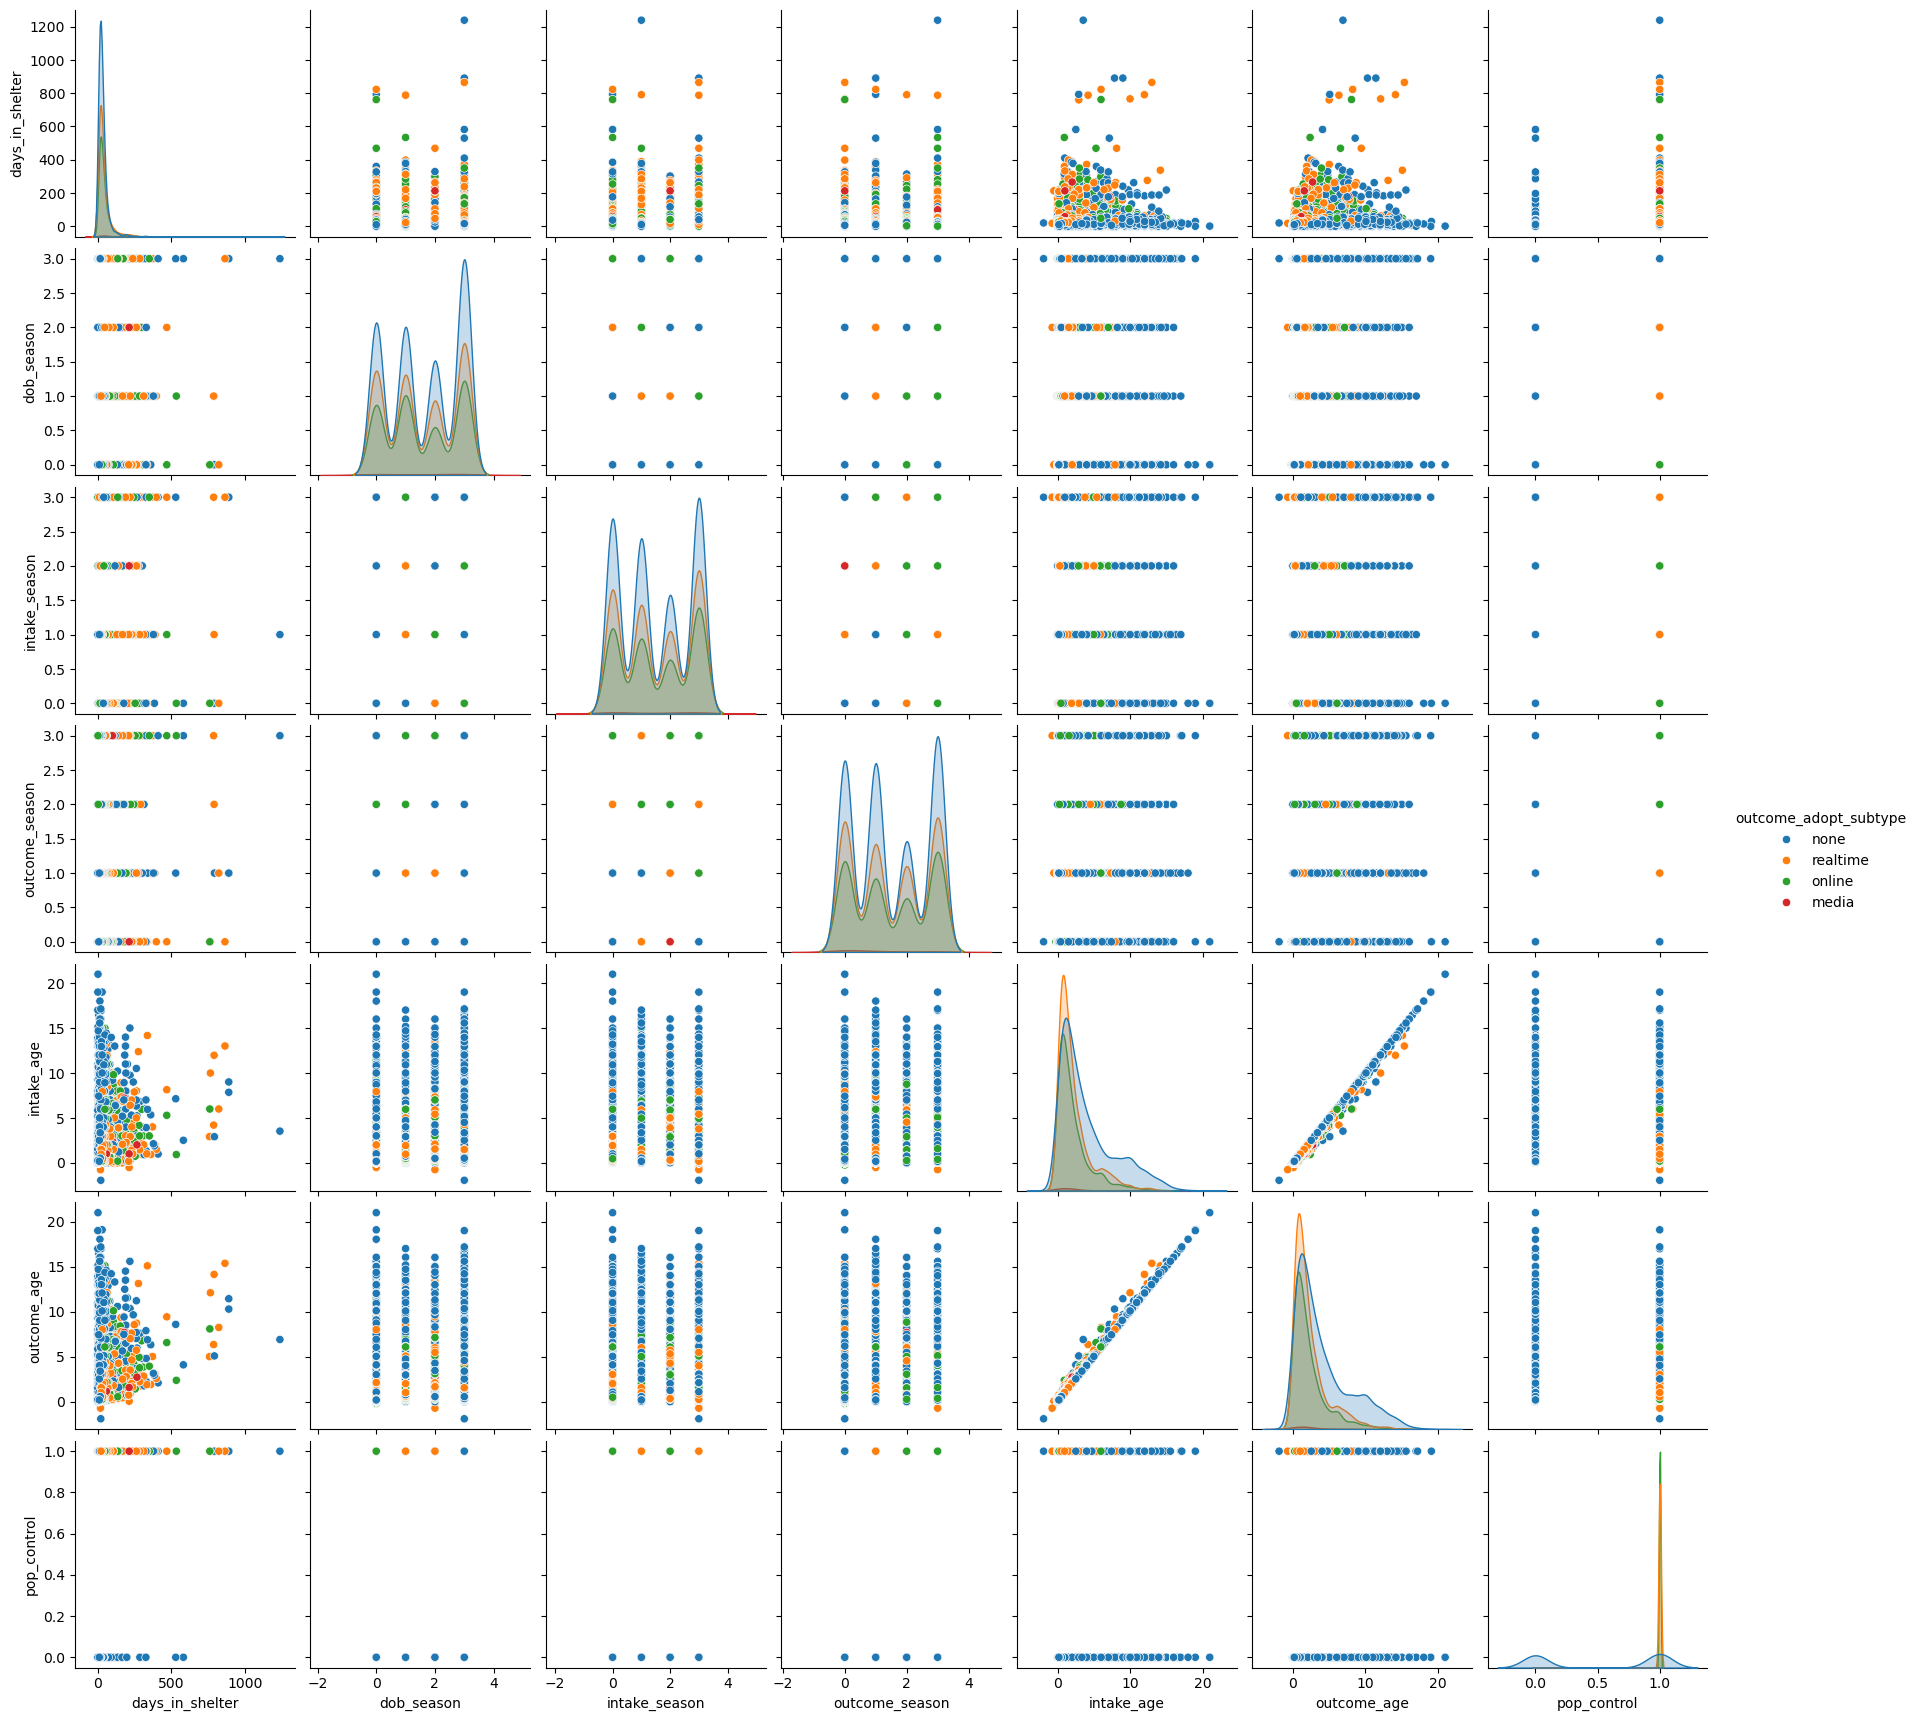

<Figure size 640x480 with 0 Axes>

In [22]:
print(dog_df.outcome_adopt_subtype.value_counts())
print()

sns.pairplot(dog_df[['sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']],
             hue="outcome_adopt_subtype")
plt.show()
plt.clf()

outcome_adopt_subtype
realtime    2036
online      1520
media         33
Name: count, dtype: int64



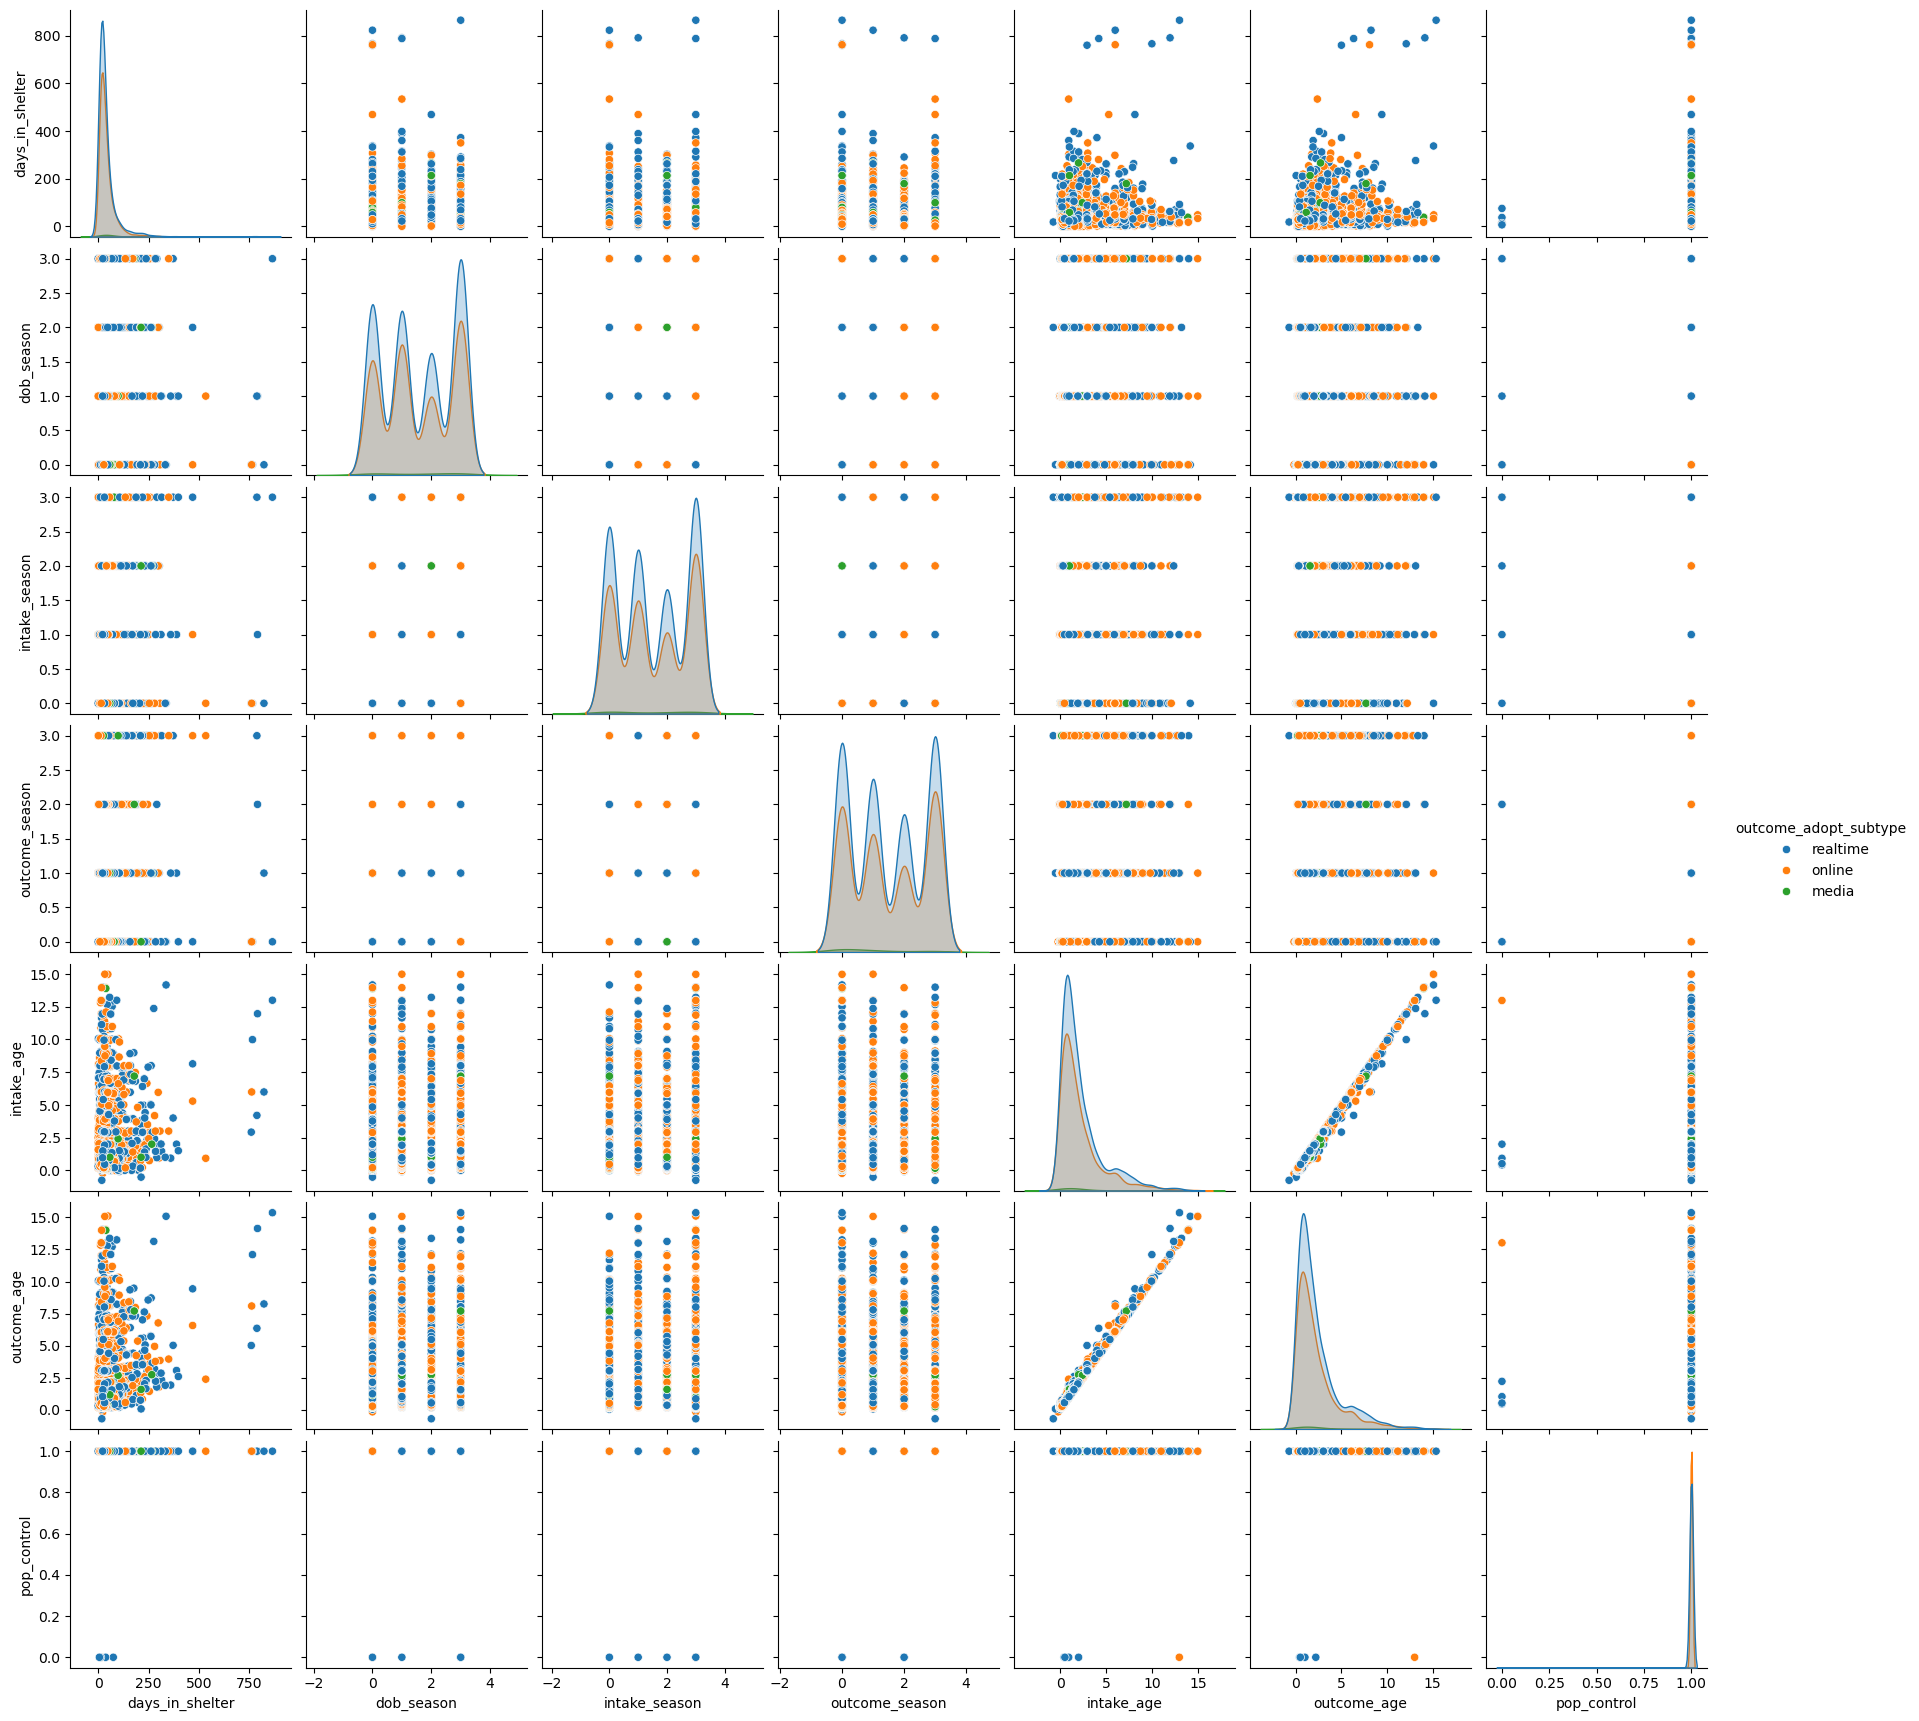

<Figure size 640x480 with 0 Axes>

In [25]:
PLOT_DF = dog_df.copy()[dog_df.outcome_adopt_subtype != "none"]

print(PLOT_DF.outcome_adopt_subtype.value_counts())
print()

sns.pairplot(PLOT_DF[['sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']],
             hue="outcome_adopt_subtype")
plt.show()
plt.clf()
del PLOT_DF

sex
Male       3487
Female     2979
Unknown      39
Name: count, dtype: int64



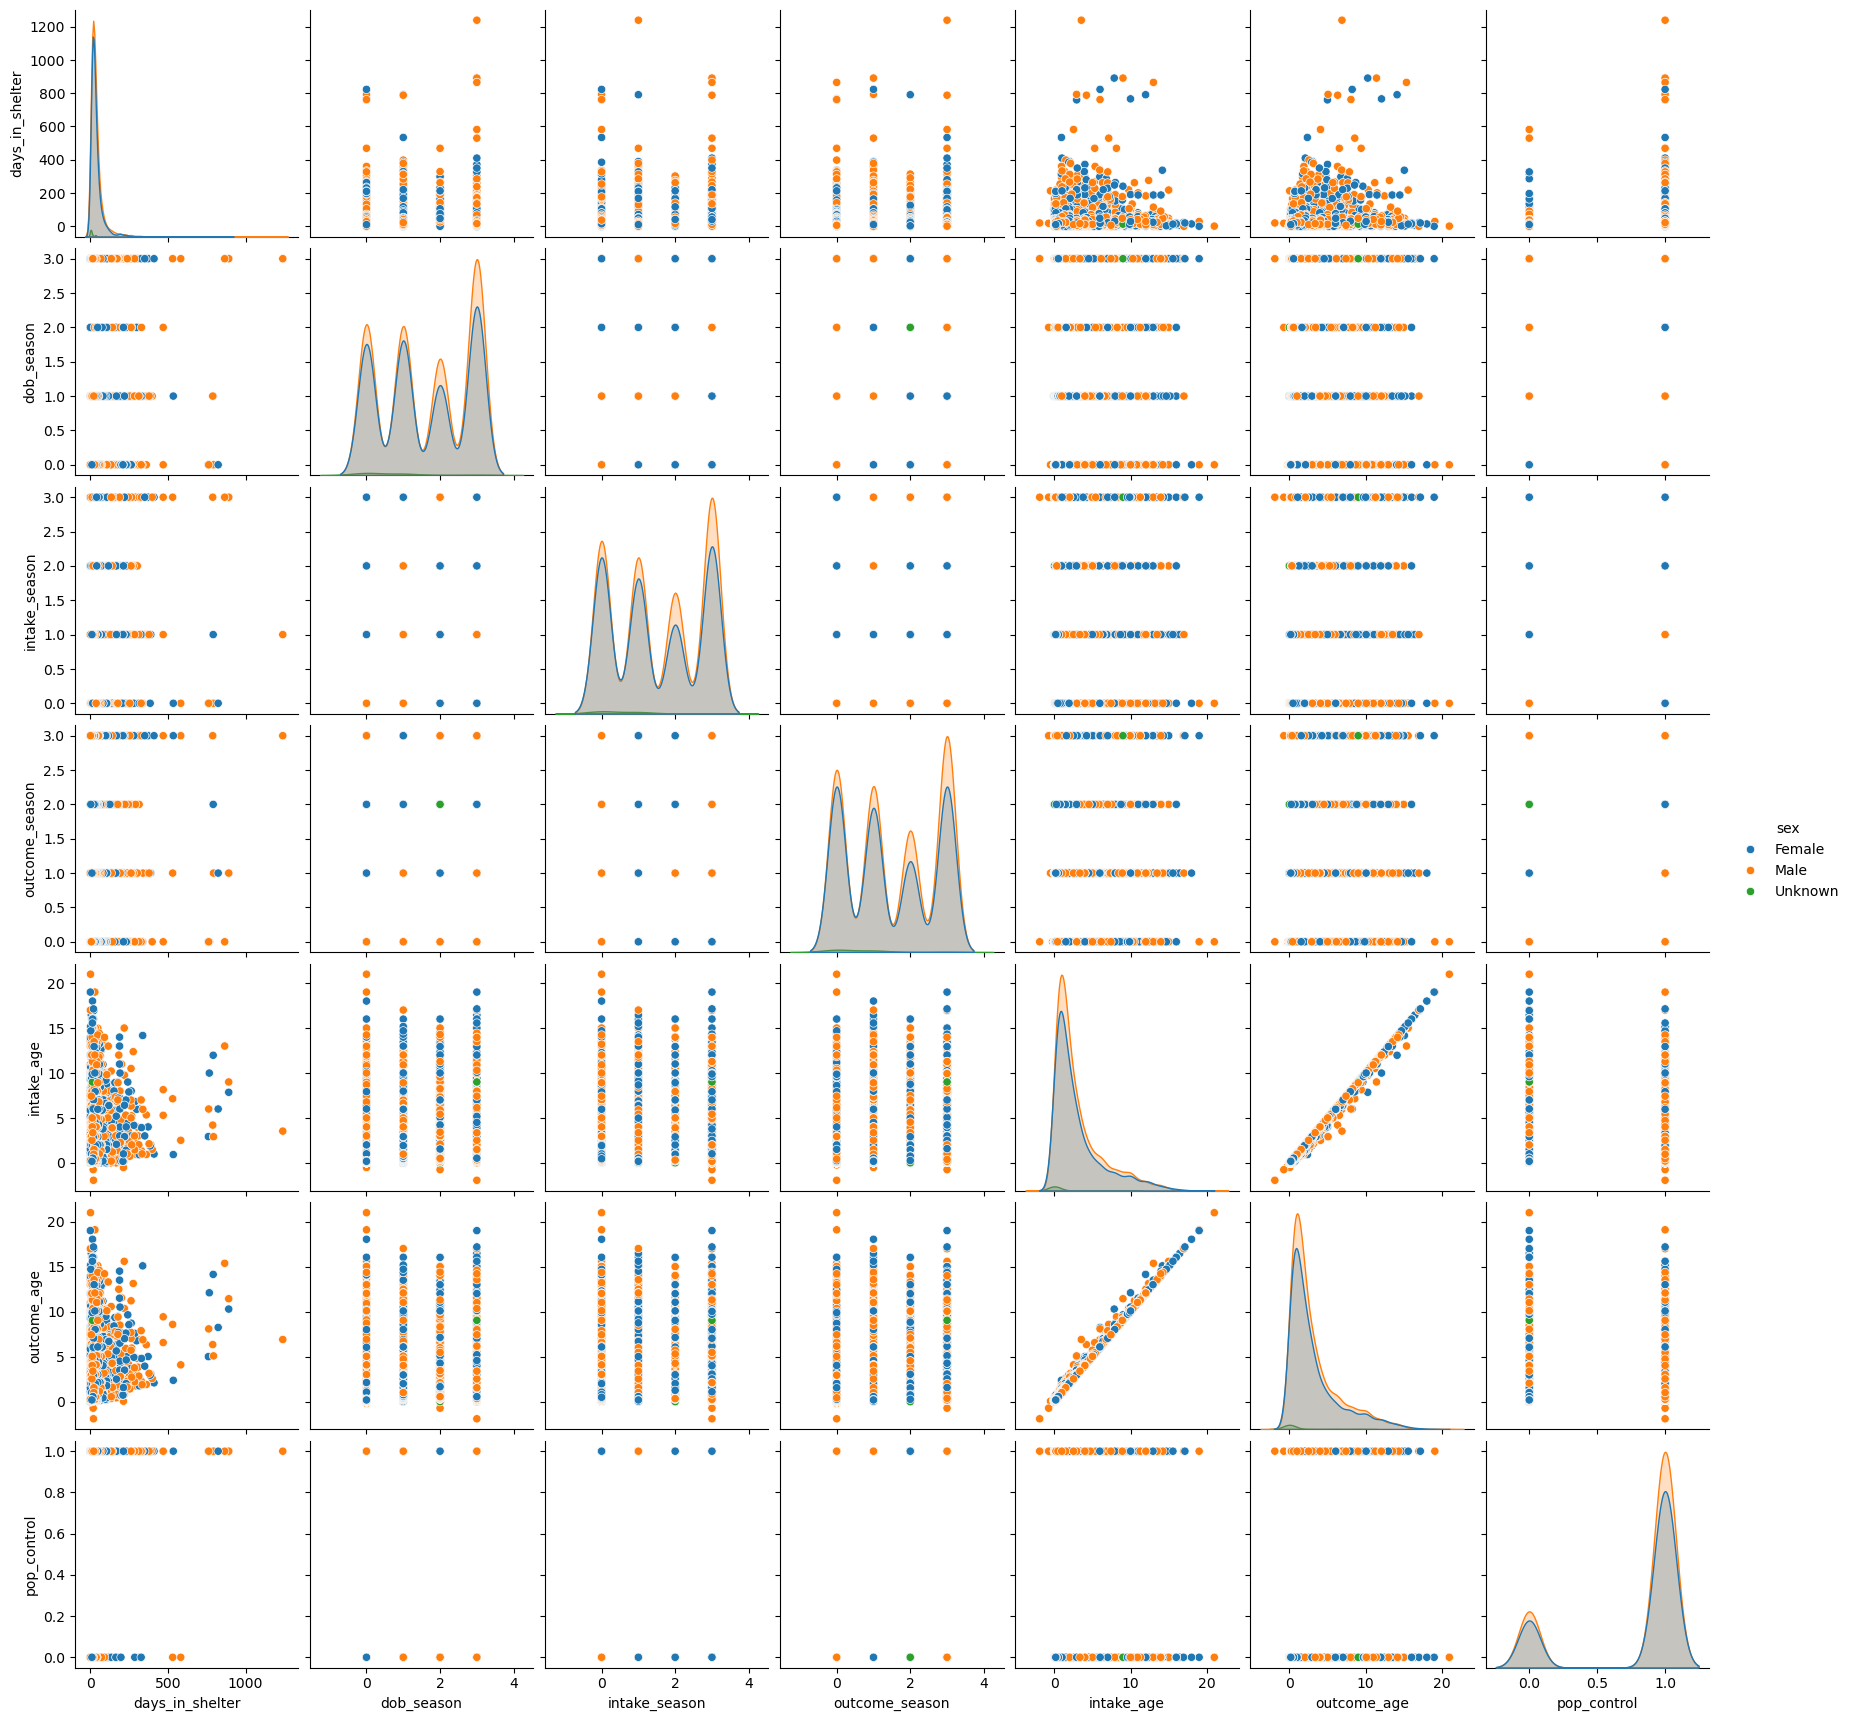

<Figure size 640x480 with 0 Axes>

In [23]:
print(dog_df.sex.value_counts())
print()

sns.pairplot(dog_df[['sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']],
             hue="sex")
plt.show()
plt.clf()

In [14]:
dog_df[dog_df.sex == "Unknown"]

breed        color      sex   size date_of_birth  \
2604               POODLE TOY/MIX        WHITE  Unknown  SMALL    2013-11-30   
3516                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3517                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3518                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3519                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3520                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3521                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3522                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3523                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3524                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3525                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3526                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3527                   ROTTWEILER    BLACK/TAN  Unknown  PUPPY    2018-03-18   
3595                 PIT BULL/MIX        WHITE  Unknown  PUPPY    2018-04-28   
3596                 PIT BULL/MIX        WHITE  Unknown  PUPPY    2018-04-28   
3597                 PIT BULL/MIX   WHITE/FAWN  Unknown  PUPPY    2018-04-28   
3598                 PIT BULL/MIX   WHITE/FAWN  Unknown  PUPPY    2018-04-28   
3599                 PIT BULL/MIX   BLUE/BROWN  Unknown  PUPPY    2018-04-28   
3601                 PIT BULL/MIX   BLUE/WHITE  Unknown  PUPPY    2018-04-28   
3902          CHINESE SHARPEI/MIX        BLACK  Unknown  PUPPY    2018-10-18   
5426              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5427              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5429              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5430              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5431              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5432              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5433              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5435              AUST CATTLE DOG    TAN/BLACK  Unknown  PUPPY    2022-02-21   
5824                 PIT BULL/MIX       AGOUTI  Unknown    MED    2017-01-10   
6008                 PAPILLON/MIX       AGOUTI  Unknown  PUPPY    2023-05-12   
6009                 PAPILLON/MIX       AGOUTI  Unknown  PUPPY    2023-05-12   
6010                 PAPILLON/MIX       AGOUTI  Unknown  PUPPY    2023-05-12   
6011                 PAPILLON/MIX       AGOUTI  Unknown  PUPPY    2023-05-12   
6012                 PAPILLON/MIX       AGOUTI  Unknown  PUPPY    2023-05-12   
6056             CHIHUAHUA LH/MIX        BLACK  Unknown  PUPPY    2023-06-08   
6059             CHIHUAHUA LH/MIX        BLACK  Unknown  PUPPY    2023-06-08   
6060                 CHIHUAHUA SH       AGOUTI  Unknown  PUPPY    2023-06-09   
6168  CHIHUAHUA SH/YORKSHIRE TERR          TAN  Unknown  PUPPY    2023-08-21   
6317            AUST SHEPHERD/MIX  BLACK/WHITE  Unknown    MED    2014-12-05   

     animal_id intake_date outcome_date  days_in_shelter intake_type  ...  \
2604   A345758  2016-11-30   2016-12-13               13       STRAY  ...   
3516   A369465  2018-03-19   2018-03-20                1       STRAY  ...   
3517   A369470  2018-03-19   2018-03-20                1       STRAY  ...   
3518   A369473  2018-03-19   2018-03-20                1       STRAY  ...   
3519   A369466  2018-03-19   2018-03-20                1       STRAY  ...   
3520   A369468  2018-03-19   2018-03-20                1       STRAY  ...   
3521   A369469  2018-03-19   2018-03-20                1       STRAY  ...   
3522   A369475  2018-03-19   2018-03-19                0       STRAY  ...   
3523   A369471  2018-03-19   2018-03-20                1       STRAY  ...   
3524   A369467  2018-03-19   2018-03-20                1 

size
MED      1762
SMALL    1677
LARGE    1496
PUPPY     887
TOY       623
X-LRG      60
Name: count, dtype: int64



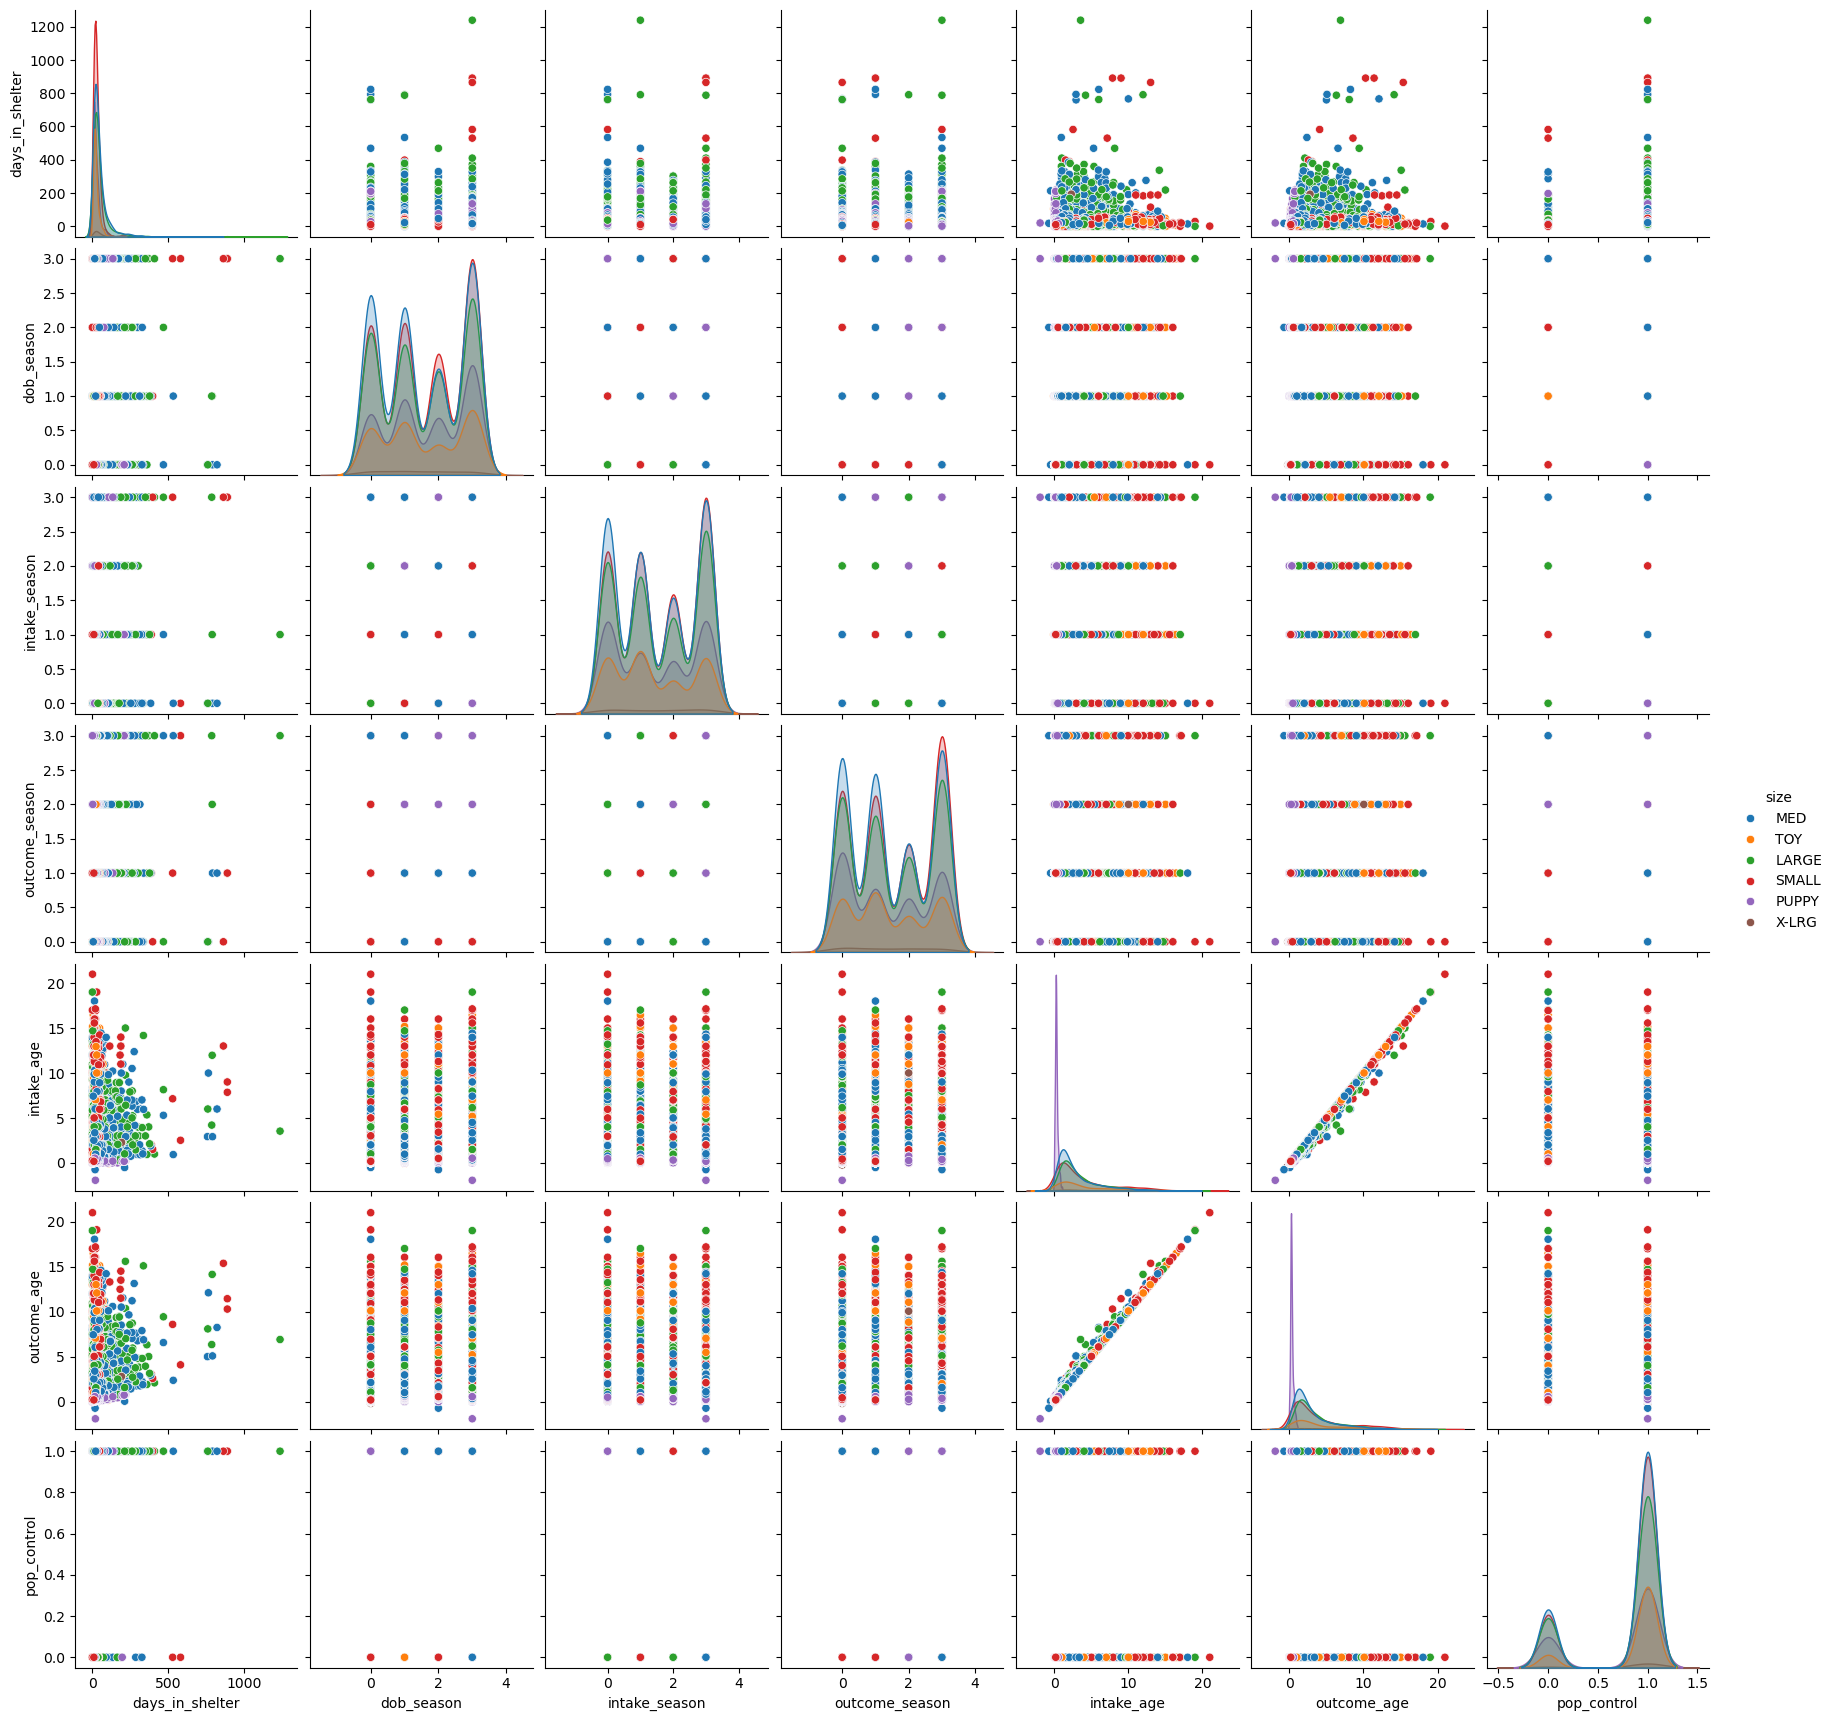

<Figure size 640x480 with 0 Axes>

In [27]:
print(dog_df['size'].value_counts())
print()
sns.pairplot(dog_df[['sex','size','days_in_shelter','intake_type','intake_condition','dob_season','intake_season','outcome_season','outcome_adopt_subtype','intake_age','outcome_age','pop_control']],
             hue="size")
plt.show()
plt.clf()


### split

In [84]:
dog_df['sex_bin'] = 1*(dog_df.sex=="Female")

size_dict = {'PUPPY':0, 'TOY':1, 'SMALL':2, 'MED':3, 'LARGE':4,'X-LRG':5}
dog_df['size_bin'] = dog_df['size'].map(size_dict)
del size_dict

dog_df['breed_pit'] = 1*(dog_df.breed.str.contains("PIT"))

dog_df

breed        color     sex   size date_of_birth animal_id  \
0              PIT BULL   GRAY/WHITE  Female    MED    2012-09-03   A296009   
1              PIT BULL   BLUE/WHITE  Female    MED    2012-10-09   A294143   
2      CAROLINA DOG/MIX   GOLD/WHITE    Male    MED    2007-09-07   A281788   
3          CHIHUAHUA SH          TAN    Male    TOY    2007-10-01   A297574   
4              PIT BULL    TAN/WHITE    Male    MED    2012-10-29   A298002   
...                 ...          ...     ...    ...           ...       ...   
6500  LABRADOR RETR/MIX   BR BRINDLE  Female  PUPPY    2023-10-10   A425814   
6501  LABRADOR RETR/MIX   BL BRINDLE  Female  PUPPY    2023-10-10   A425816   
6502  LABRADOR RETR/MIX        BLACK    Male  SMALL    2024-01-20   A426010   
6503  SCHNAUZER MIN/MIX        WHITE    Male    MED    2020-12-16   A426021   
6504      SCHNAUZER MIN  BLACK/WHITE  Female  SMALL    2024-02-27   A426113   

     intake_date outcome_date  days_in_shelter      intake_type  ...  \
0     2013-08-22   2014-04-14              235         TRANSFER  ...   
1     2013-08-31   2014-04-14              226            STRAY  ...   
2     2013-09-19   2014-07-30              314            STRAY  ...   
3     2013-10-01   2014-01-01               92  OWNER SURRENDER  ...   
4     2013-10-08   2014-05-22              226            STRAY  ...   
...          ...          ...              ...              ...  ...   
6500  2024-04-18   2024-05-04               16  OWNER SURRENDER  ...   
6501  2024-04-18   2024-05-04               16  OWNER SURRENDER  ...   
6502  2024-04-20   2024-04-20                0            STRAY  ...   
6503  2024-04-22   2024-05-08               16            STRAY  ...   
6504  2024-04-27   2024-05-07               10            STRAY  ...   

     intake_season outcome_season outcome_adopt outcome_adopt_subtype  \
0                2              1         False                  none   
1                2              1         False                  none   
2                3              2         False                  none   
3                3              0         False                  none   
4                3              1          True              realtime   
...            ...            ...           ...                   ...   
6500             1              1         False                  none   
6501             1              1         False                  none   
6502             1              1         False                  none   
6503             1              1         False                  none   
6504             1              1         False                  none   

     intake_age  outcome_age  pop_control  sex_bin  size_bin breed_pit  
0          0.97         1.61            1        1         3         1  
1          0.89         1.51            1        1         3         1  
2          6.03         6.90            0        0         3         0  
3          6.00         6.25            1        0         1         0  
4          0.95         1.57            1        0         3         1  
...         ...          ...          ...      ...       ...       ...  
6500       0.52         0.57            0        1         0         0  
6501       0.52         0.57            0        1         0         0  
6502       0.25         0.25            0        0         2         0  
6503       3.35         3.40            0        0         3         0  
6504       0.17         0.20            0        1         2         0  

[6505 rows x 26 columns]

In [85]:
print(len(dog_df))

print()

print(len(dog_df[dog_df.days_in_shelter > 0]))

6505

6416


In [89]:
dog_df[(dog_df.days_in_shelter == 0)&(dog_df.outcome_adopt==True)]['outcome_adopt_subtype']

1070    realtime
1075    realtime
1404    realtime
2903      online
3023    realtime
3300    realtime
3410      online
3415    realtime
4498    realtime
4624      online
4709      online
5742      online
6191      online
6345      online
6365    realtime
Name: outcome_adopt_subtype, dtype: object